In [ ]:
!pip install auto-sklearn

     |████████████████████████████████| 6.3 MB 4.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.1 MB/s 
     |████████████████████████████████| 722 kB 57.2 MB/s 
     |████████████████████████████████| 4.2 MB 52.7 MB/s 
     |████████████████████████████████| 4.0 MB 51.0 MB/s 
     |████████████████████████████████| 208 kB 68.9 MB/s 
     |████████████████████████████████| 973 kB 34.5 MB/s 
     |████████████████████████████████| 132 kB 56.7 MB/s 
     |████████████████████████████████| 45 kB 1.1 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.2-py3-none-any.whl size=6586738 sha256=7d9a62858bfbc46fde760867d750e3de0e511b95fbf66c1a78e8b893544532e7
  Stored in directory: /root/.cache/pip/wheels/b6/ba/aa/ce7b8deb41019b9c1c6cd0b511d553350b7075ba1d3f0f545c
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=a6a827bb6cdc2e6ef121cca0aa9d7cc9e2cffb3277f9b9491ceee3789ea4a7c

In [ ]:
!pip install sklearn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics
import autosklearn.regression

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ml.xlsx to ml.xlsx


In [ ]:
dt = pd.read_excel('ml.xlsx')

In [ ]:
df = dt
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63322 entries, 0 to 63321
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Район                                            63322 non-null  int64  
 1   Стадия строительной готовности на дату договора  63322 non-null  int64  
 2   Срок ввода в эксплуатацию - Старт продаж         62937 non-null  float64
 3   Класс                                            63322 non-null  int64  
 4   Девелопер                                        63322 non-null  int64  
 5   Срок ввода в эксплуатацию - Договор              62937 non-null  float64
 6   Квартал договора                                 63322 non-null  int64  
 7   Квартал регистрации                              63322 non-null  int64  
 8   Тип сделки                                       63322 non-null  int64  
 9   Тип объекта                 

In [ ]:
Y = df.pop('Цена за кв. метр')
Y

0         95325.34
1        114000.00
2        143000.00
3        102625.78
4        131700.00
           ...    
63317    169500.00
63318    161500.00
63319    154738.80
63320    154241.35
63321    159550.33
Name: Цена за кв. метр, Length: 62937, dtype: float64

In [ ]:
X=df
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62937 entries, 0 to 63321
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Район                                            62937 non-null  int64  
 1   Стадия строительной готовности на дату договора  62937 non-null  int64  
 2   Срок ввода в эксплуатацию - Старт продаж         62937 non-null  float64
 3   Класс                                            62937 non-null  int64  
 4   Девелопер                                        62937 non-null  int64  
 5   Срок ввода в эксплуатацию - Договор              62937 non-null  float64
 6   Квартал договора                                 62937 non-null  int64  
 7   Квартал регистрации                              62937 non-null  int64  
 8   Тип сделки                                       62937 non-null  int64  
 9   Тип объекта                 

In [ ]:
X['Район'] = pd.Categorical(X['Район'])
X['Стадия строительной готовности на дату договора'] = pd.Categorical(X['Стадия строительной готовности на дату договора'])
X['Класс'] = pd.Categorical(X.Класс)
X['Девелопер'] = pd.Categorical(X.Девелопер)
X['Квартал договора'] = pd.Categorical(X['Квартал договора'])
X['Квартал регистрации'] = pd.Categorical(X['Квартал регистрации'])
X['Тип сделки'] = pd.Categorical(X['Тип сделки'])
X['Тип объекта'] = pd.Categorical(X['Тип объекта'])
X['Метод определения цены'] = pd.Categorical(X['Метод определения цены'])
X['Включение скидок/акций в ценообразование'] = pd.Categorical(X['Включение скидок/акций в ценообразование'])
X['Тип продавца'] = pd.Categorical(X['Тип продавца'])
X['Тип покупателя'] = pd.Categorical(X['Тип покупателя'])
X['Тип ипотеки'] = pd.Categorical(X['Тип ипотеки'])
X['Участие объекта в оптовой сделке'] = pd.Categorical(X['Участие объекта в оптовой сделке'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62937 entries, 0 to 63321
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   Район                                            62937 non-null  category
 1   Стадия строительной готовности на дату договора  62937 non-null  category
 2   Срок ввода в эксплуатацию - Старт продаж         62937 non-null  float64 
 3   Класс                                            62937 non-null  category
 4   Девелопер                                        62937 non-null  category
 5   Срок ввода в эксплуатацию - Договор              62937 non-null  float64 
 6   Квартал договора                                 62937 non-null  category
 7   Квартал регистрации                              62937 non-null  category
 8   Тип сделки                                       62937 non-null  category
 9   Тип объекта      

In [ ]:
types = ['Categorical', 'Categorical', 'Numerical', 'Categorical', 'Categorical', 'Numerical', 'Categorical', 'Categorical', 'Categorical','Categorical', 'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Categorical','Categorical', 'Numerical', 'Numerical', 'Categorical','Categorical', 'Numerical', 'Categorical','Categorical', 'Numerical', 'Numerical', 'Numerical']

In [ ]:
X.head()

,Район,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,0,6,1156.0,2,0,546.0,1,1,1,1,4,5,0,27.43,4,0,12,8,1,0,1,1,1,0,0.0
1,0,1,821.0,2,3,546.0,1,2,1,1,4,11,2,62.60,4,0,2,0,1,0,1,1,1,211,7.5
2,0,1,821.0,2,3,546.0,1,2,1,1,13,22,0,24.10,4,0,2,0,1,0,3,1,1,211,16.3
3,0,1,1155.0,2,0,271.0,1,4,0,1,4,6,0,28.22,4,0,12,0,1,0,1,0,1,0,0.0
4,0,1,789.0,2,17,453.0,1,1,1,1,1,21,2,51.20,4,0,2,8,1,0,1,1,1,275,15.0


In [ ]:
Y.head()

0     95325.34
1    114000.00
2    143000.00
3    102625.78
4    131700.00
Name: Цена за кв. метр, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    train_size=0.75, test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47202, 25), (15735, 25), (47202,), (15735,))

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=240)
automl.fit(X_train, y_train)

AutoSklearnRegressor(per_run_time_limit=24, time_left_for_this_task=240)

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
10           1              1.0  gradient_boosting  0.072906  12.792227


In [ ]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.9497206997267983
Test R2 score: 0.9326441196768666


In [ ]:
automl.get_params()

{'dask_client': None,
 'delete_tmp_folder_after_terminate': True,
 'disable_evaluator_output': False,
 'ensemble_nbest': 50,
 'ensemble_size': 50,
 'exclude': None,
 'get_smac_object_callback': None,
 'get_trials_callback': None,
 'include': None,
 'initial_configurations_via_metalearning': 25,
 'load_models': True,
 'logging_config': None,
 'max_models_on_disc': 50,
 'memory_limit': 3072,
 'metadata_directory': None,
 'metric': None,
 'n_jobs': None,
 'per_run_time_limit': 24,
 'resampling_strategy': 'holdout',
 'resampling_strategy_arguments': None,
 'scoring_functions': None,
 'seed': 1,
 'smac_scenario_args': None,
 'time_left_for_this_task': 240,
 'tmp_folder': None}

In [ ]:
automl.get_models_with_weights()

[(1.0,
  SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:feature_agglomeration:affinity': 'manhattan', 'feature_preprocessor:feature_agglomeration:linkage': 'complete', 'feature_preprocessor:feature_agglomeration:n_clusters': 21, 'feature_preprocessor:feature_agglomeration:pooling_func': 'max', 'regressor:gradient_boosting:early_stop': 'train', 'regressor:gradient_boosting:l2_regularization': 2.208787572338781e-05, 'regressor:gradient_boosting:learning

Index(['Район', 'Стадия строительной готовности на дату договора',
       'Срок ввода в эксплуатацию - Старт продаж', 'Класс', 'Девелопер',
       'Срок ввода в эксплуатацию - Договор', 'Квартал договора',
       'Квартал регистрации', 'Тип сделки', 'Тип объекта', 'Секция', 'Этаж',
       'Количество комнат', 'Площадь согласно ПД', 'Метод определения цены',
       'Включение скидок/акций в ценообразование', 'Скидки по дате договора',
       'Отделка по корпусу', 'Тип продавца', 'Тип покупателя',
       'Кол-во покупателей', 'Тип ипотеки', 'Участие объекта в оптовой сделке',
       'Срок в экспозиции до момента сделки, дней',
       'Рост цены за 1 кв.м за период экспонирования'],
      dtype='object')

In [ ]:
df2 = X_test.head(5)
df2

,Район,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
36690,0,1,822.0,2,17,378.0,3,3,1,1,1,3,3,72.5,4,0,0,8,1,0,2,0,1,64,1.3
38022,0,3,667.0,2,19,639.0,3,4,1,1,3,8,2,49.9,1,0,0,8,1,0,1,0,1,0,0.0
39958,0,1,630.0,2,13,252.0,4,4,1,1,10,7,3,76.8,4,0,0,8,1,0,1,0,1,36,0.0
5739,0,1,668.0,2,12,127.0,1,2,1,1,3,4,2,51.6,4,0,0,0,1,0,2,0,1,0,0.0
56485,0,1,900.0,3,13,771.0,2,2,1,1,3,5,1,38.5,4,0,0,8,1,0,1,0,1,35,0.0


In [ ]:
automl.predict(df2)

array([133496.515625 , 134828.859375 , 113123.3828125, 113832.5546875,
       159464.640625 ])

In [ ]:
import pickle

In [ ]:
with open("model.pkl", "wb") as f:
    pickle.dump(automl, f)

In [ ]:
from google.colab import files
files.download('model.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving model2.pkl to model2.pkl


In [ ]:
with open("model2.pkl", "rb") as f:
    modeld = pickle.load(f)

In [ ]:
modeld.predict(df2)

array([133496.515625 , 134828.859375 , 113123.3828125, 113832.5546875,
       159464.640625 ])

In [ ]:
y_test.head(5)

36690    133700.00
38022    137939.00
39958    113000.00
5739     115999.26
56485    171000.00
Name: Цена за кв. метр, dtype: float64

In [ ]:
train_predictions = modeld.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
print("Train MAE score:", sklearn.metrics.mean_absolute_error(y_train, train_predictions))
test_predictions = modeld.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print("Test MAE score:", sklearn.metrics.mean_absolute_error(y_test, test_predictions))

Train R2 score: 0.9497206997267983
Train MAE score: 5617.62163958848
Test R2 score: 0.9326441196768666
Test MAE score: 6422.398716684541


In [ ]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    automl, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=df.columns)

Elapsed time to compute the importances: 183.981 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  """


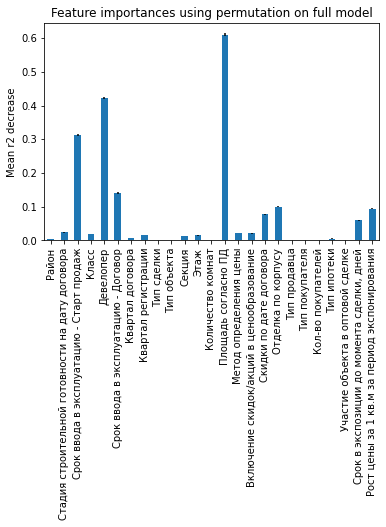

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean r2 decrease")
fig.tight_layout()
plt.show()

In [ ]:
importance = automl.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: ignored

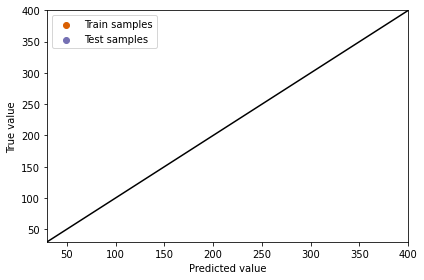

In [ ]:
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c='k', zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
reg = GradientBoostingRegressor(learning_rate = 0.036087332404571744, max_leaf_nodes=64, min_samples_leaf=3, tol=1e-07)

In [ ]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.036087332404571744, max_leaf_nodes=64,
                          min_samples_leaf=3, tol=1e-07)

In [ ]:
train_predictions = reg.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
print("Train MAE score:", sklearn.metrics.mean_absolute_error(y_train, train_predictions))
test_predictions = reg.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print("Test MAE score:", sklearn.metrics.mean_absolute_error(y_test, test_predictions))

Train R2 score: 0.5036337861628082
Train MAE score: 20258.591476328973
Test R2 score: 0.4922205336912676
Test MAE score: 20641.513842295553


In [ ]:
reg.score(X_test, y_test)

0.4922205336912676

In [ ]:
automl2 = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=1200, per_run_time_limit = 360)
automl2.fit(X_train, y_train)

AutoSklearnRegressor(per_run_time_limit=360, time_left_for_this_task=1200)

In [ ]:
print(automl2.leaderboard())

NameError: ignored

In [ ]:
train_predictions = automl2.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl2.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.9547469199280094
Test R2 score: 0.9333216264542258
